# Logistic Regression with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn import linear_model , metrics
%matplotlib inline


In [2]:
# cancer = load_breast_cancer()
cancer = load_breast_cancer()

In [3]:
# cancer.keys()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# print(cancer['DESCR'])
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# cancer['feature_names']
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
# df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
# df['Cancer'] = cancer['target']
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df['Cancer'] = cancer['target']

In [7]:
# df
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


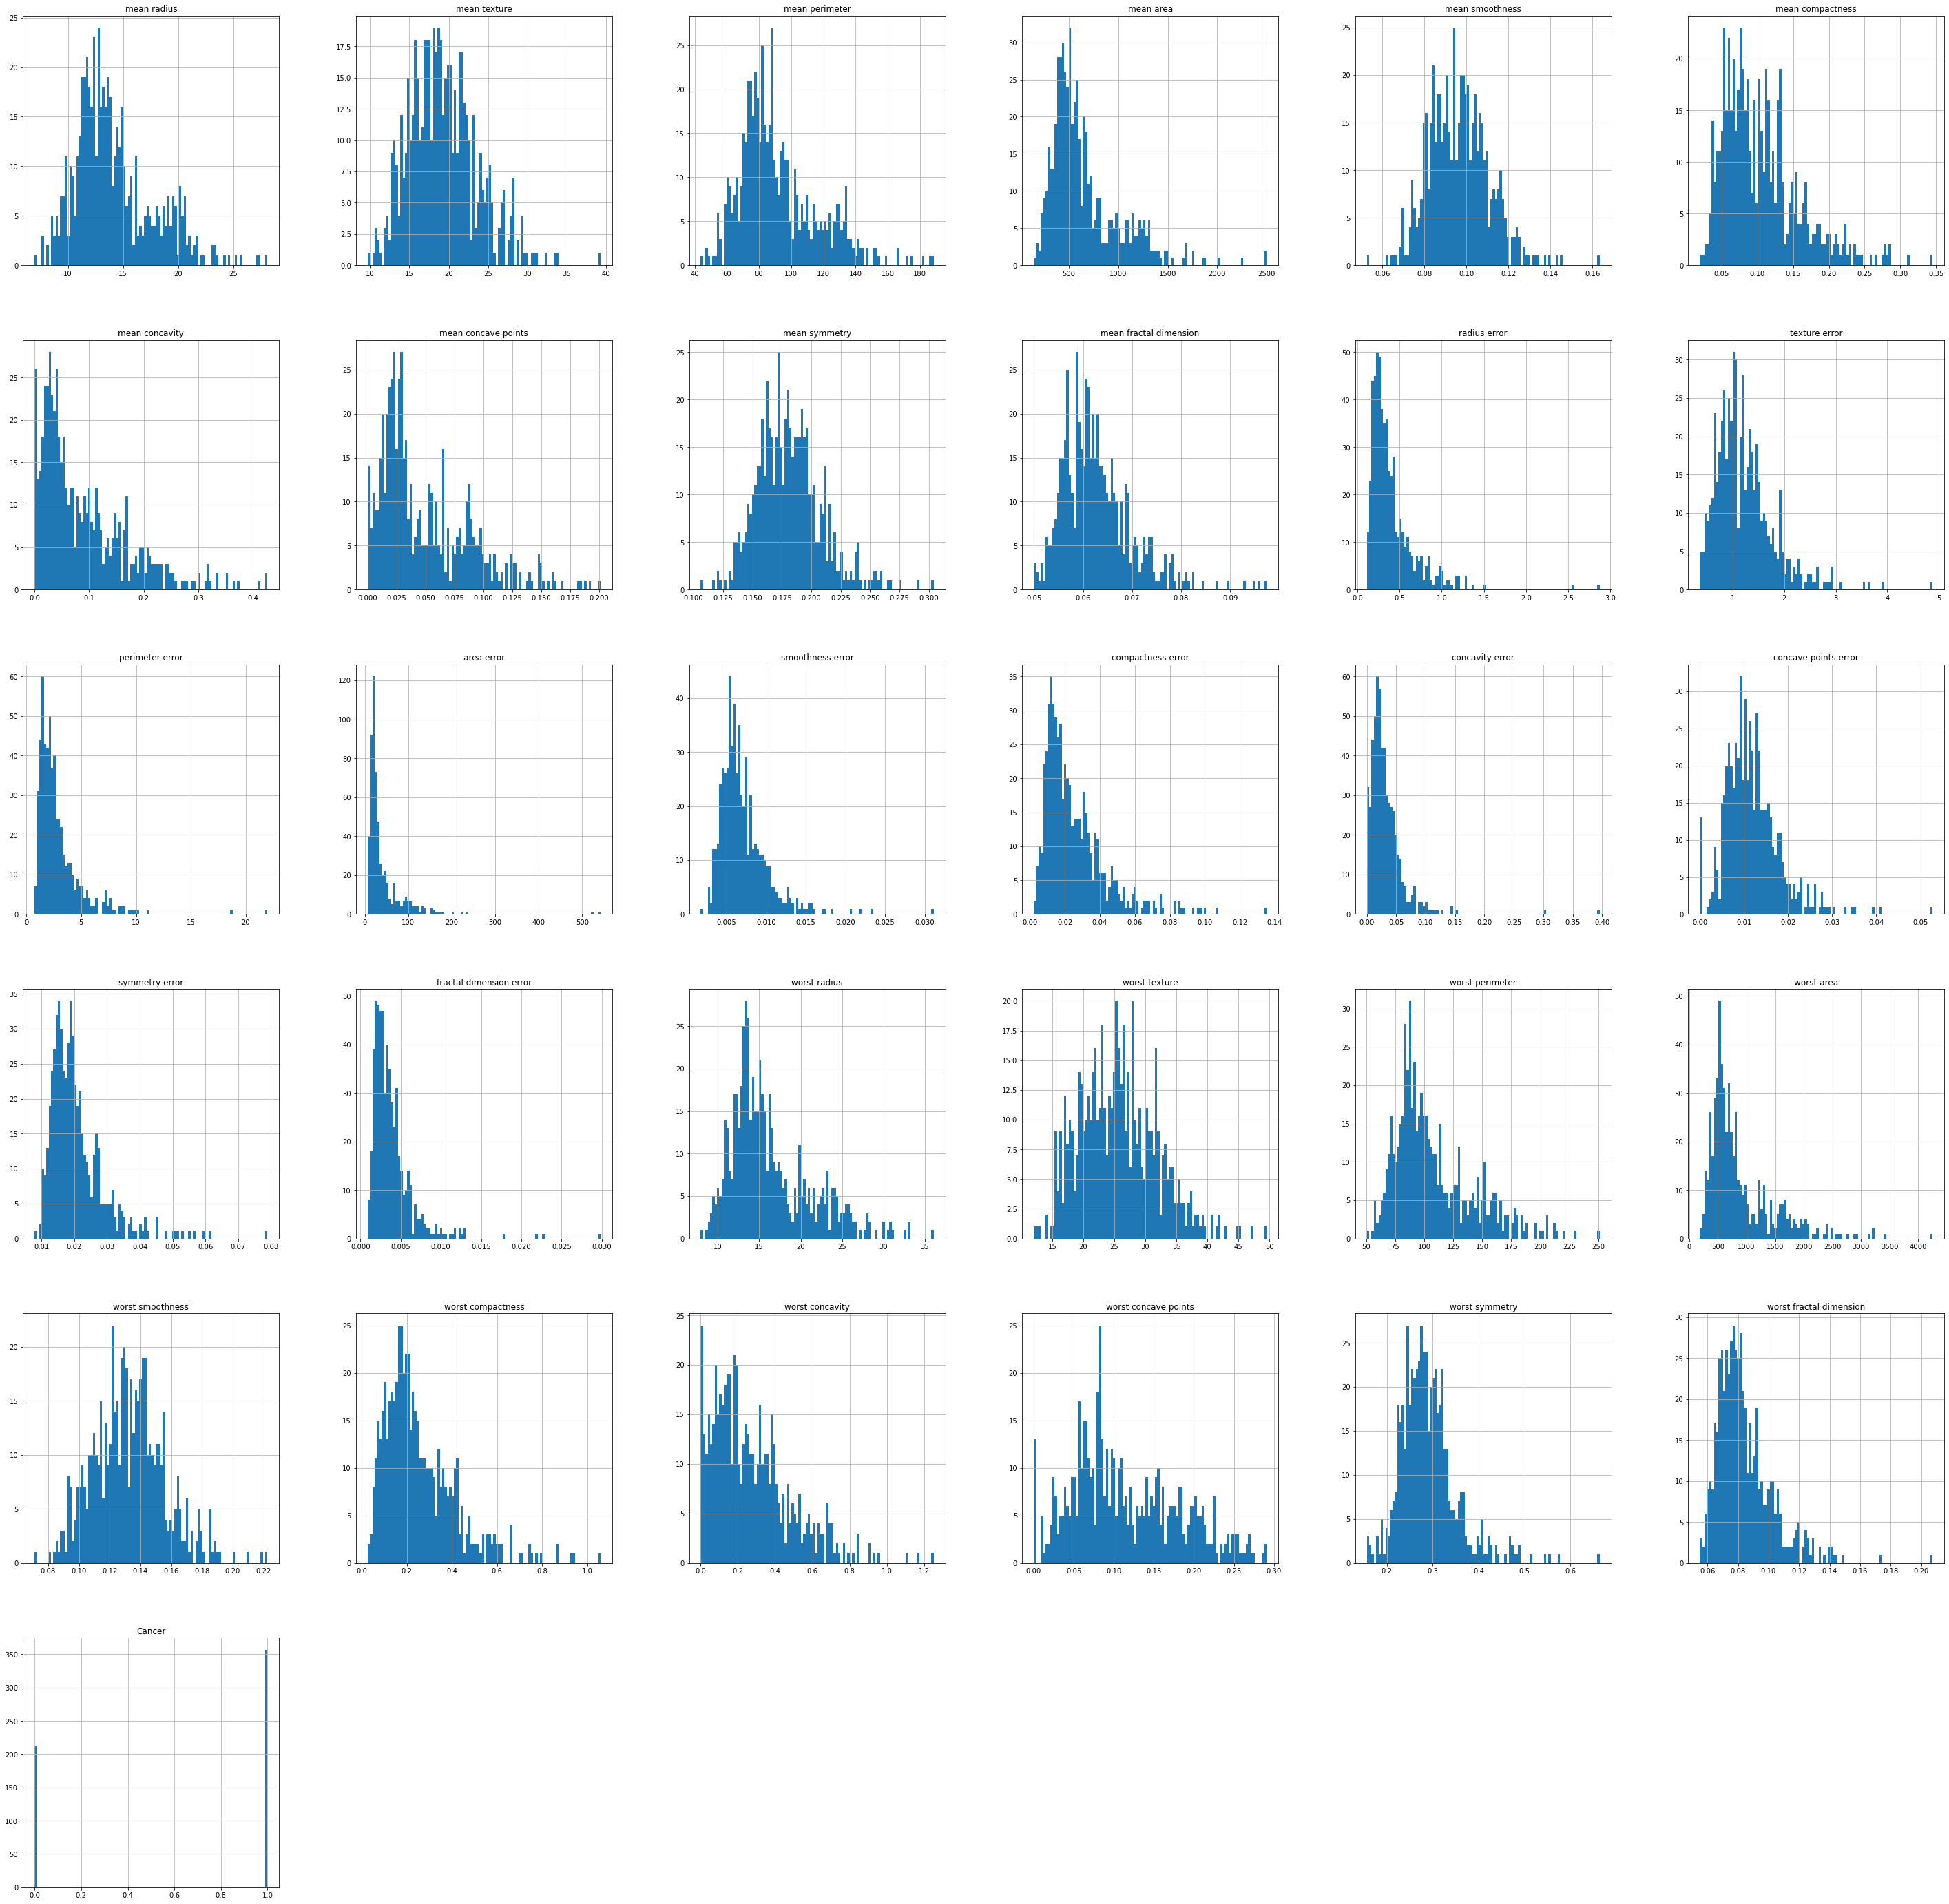

In [23]:
df.hist(bins=100,figsize=(50,50));

In [34]:
# df.corr()

In [66]:
import seaborn as sns

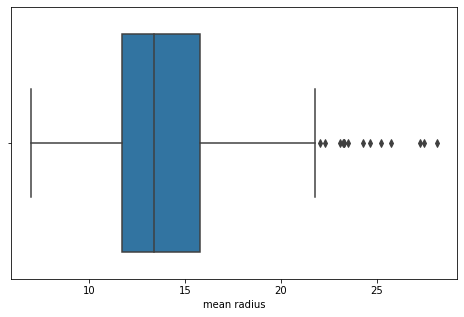

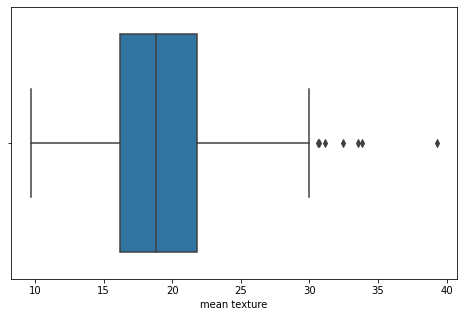

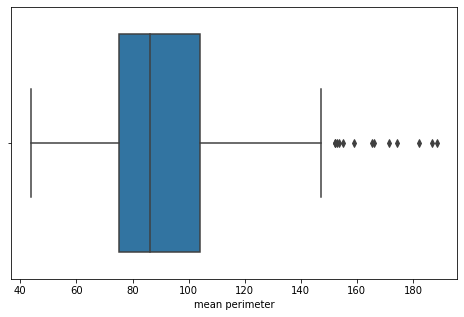

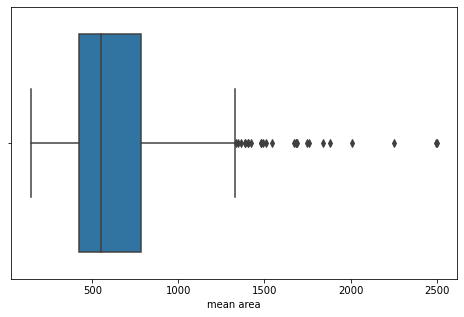

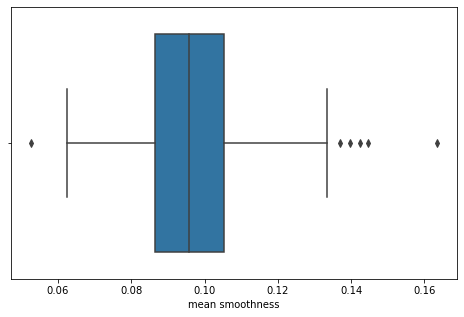

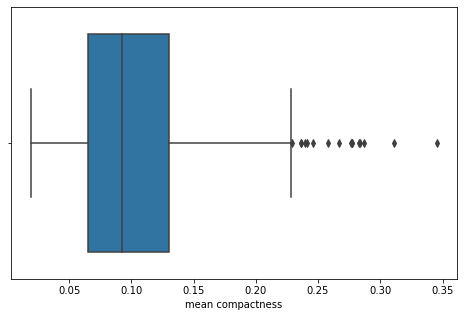

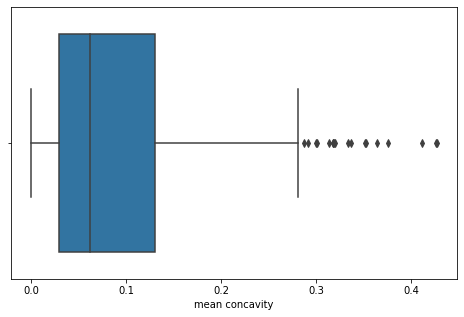

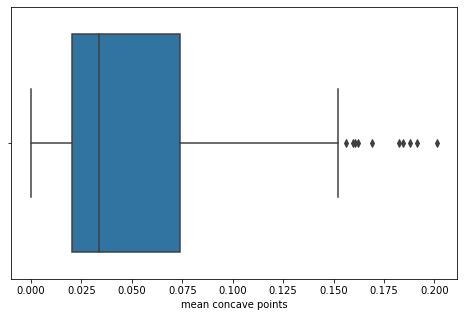

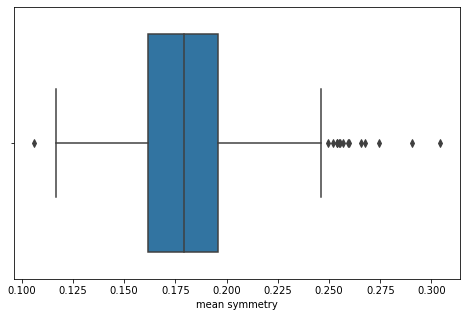

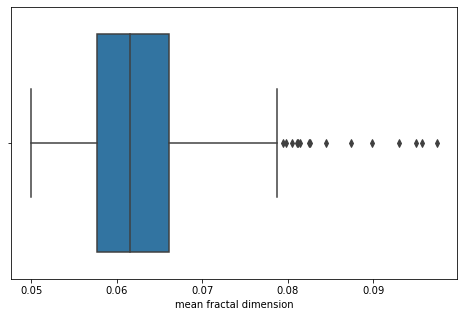

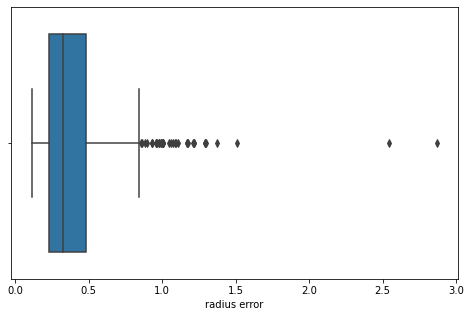

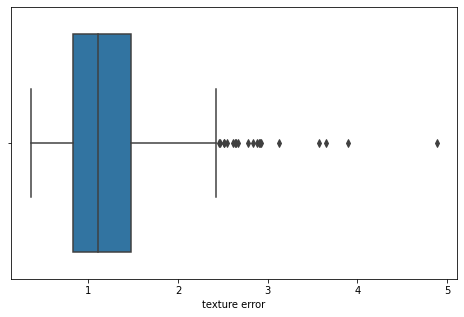

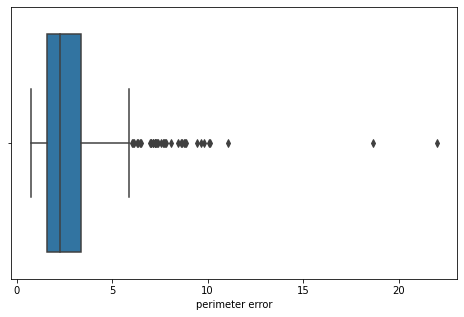

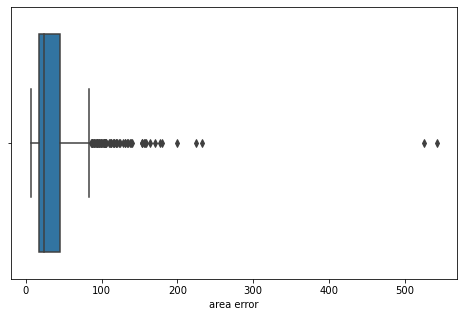

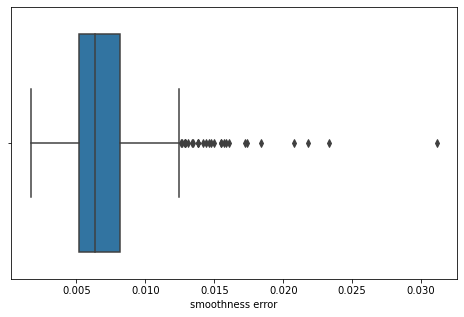

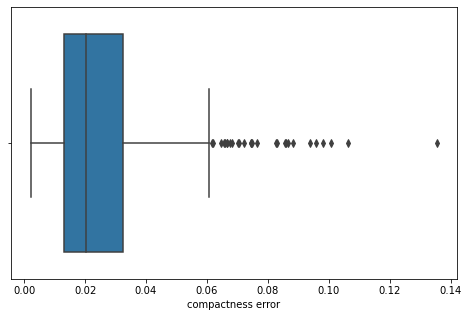

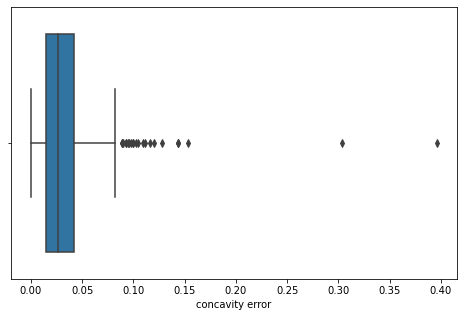

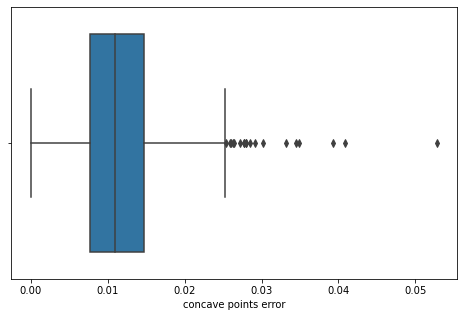

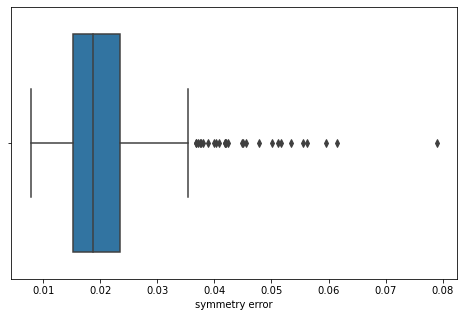

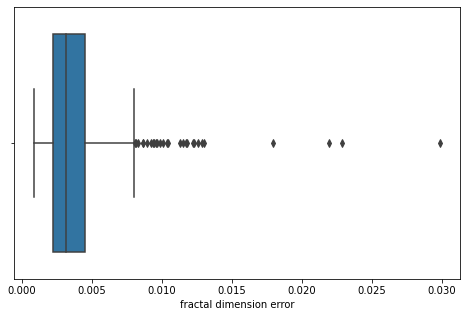

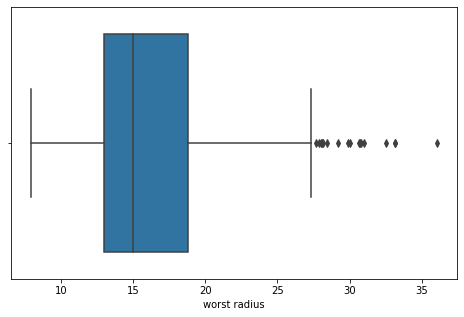

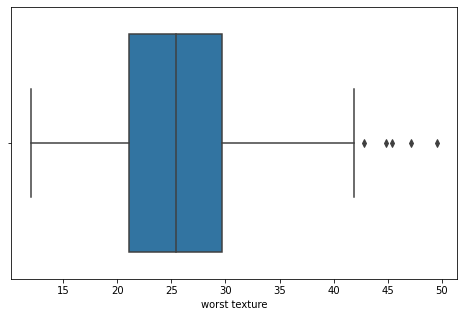

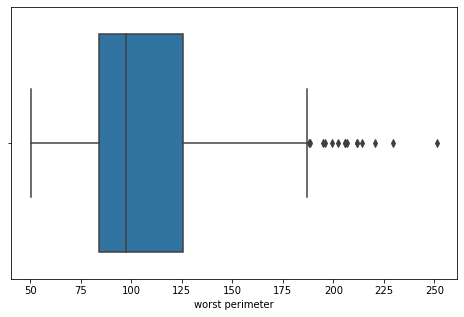

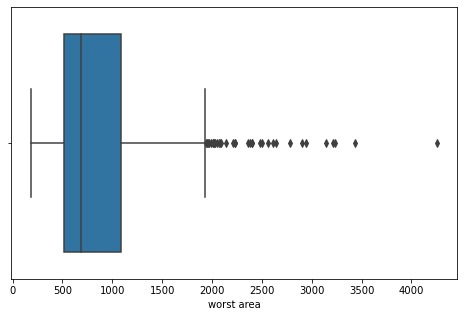

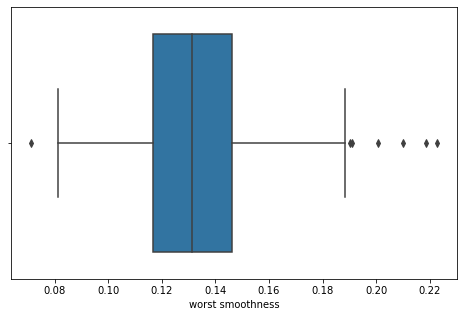

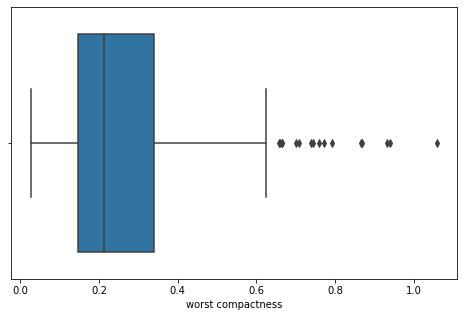

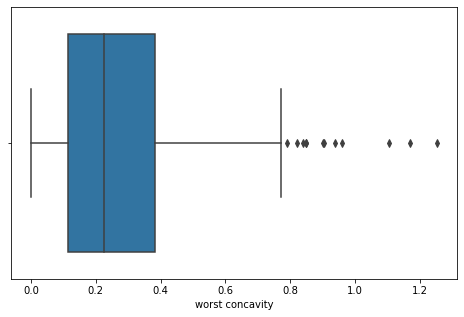

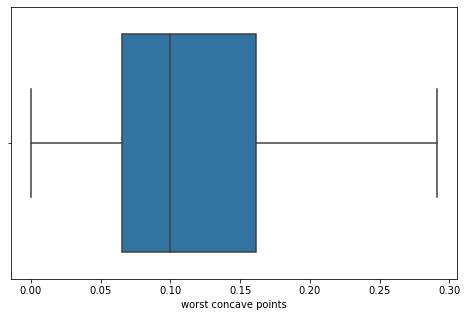

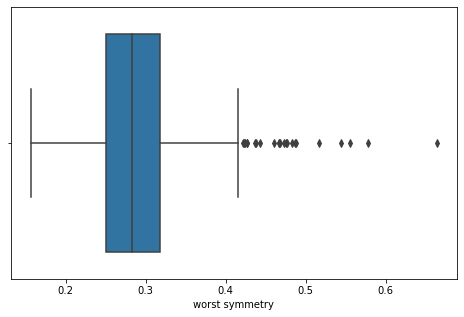

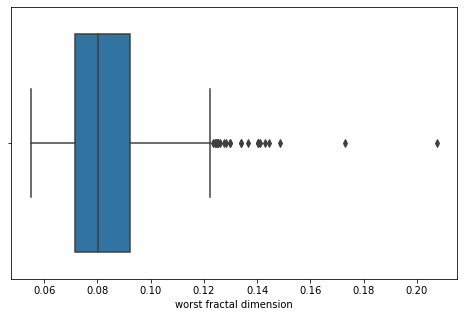

In [67]:
def bplot(col_name,data):
    for column in col_name:
        plt.figure(figsize=(8,5))
        sns.boxplot(x = data[column], data = data)
        plt.show()
        
#         q1 = data[column].quantile(0.25)
#         q2 = data[column].quantile(0.5)
#         q3 = data[column].quantile(0.75)
        
#         iqr = q3-q1
#         min_val = q1 - 1.5 * iqr
#         max_val = q3 + 1.5 * iqr
#         data[column] = np.where(data[column] < min_val, q2, data[column])
#         data[column] = np.where(data[column] > max_val, q2, data[column])
    return data
df = bplot(df.drop(['Cancer'], axis = 1).columns,df)  


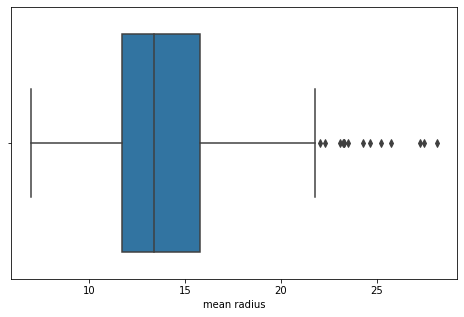

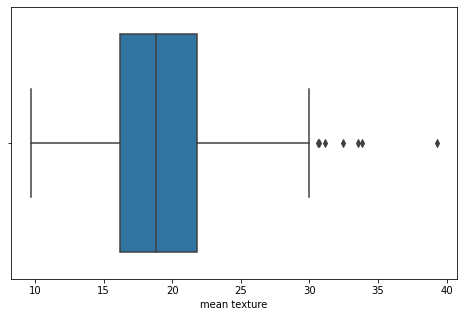

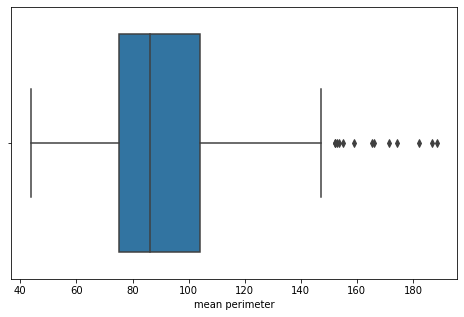

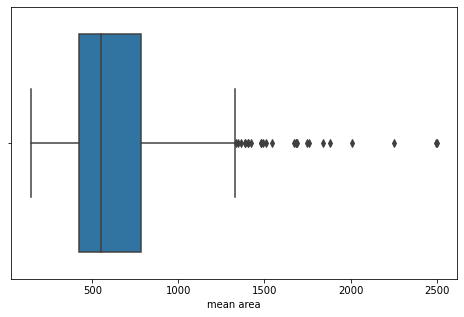

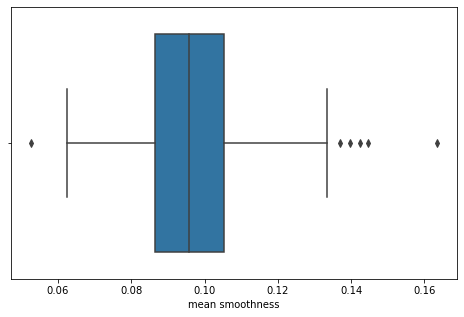

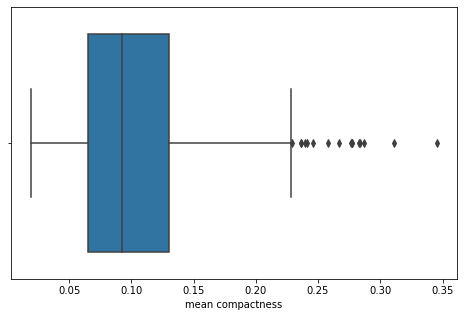

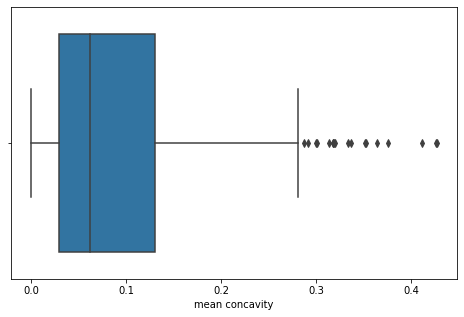

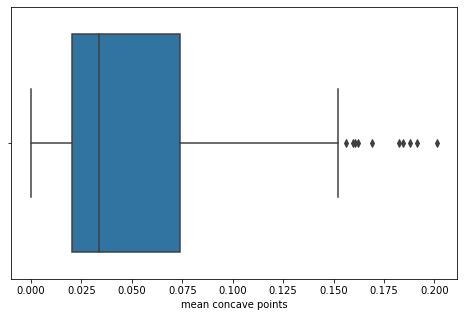

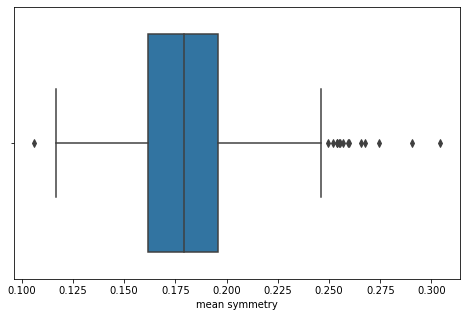

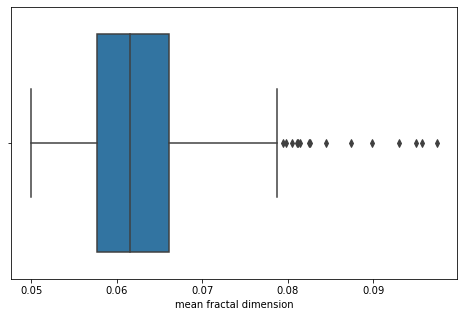

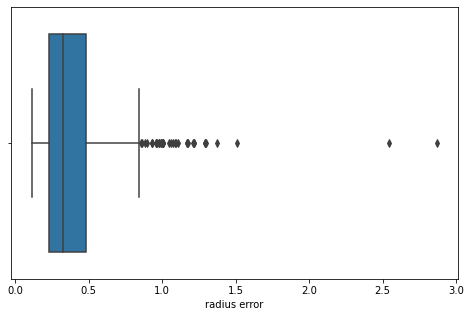

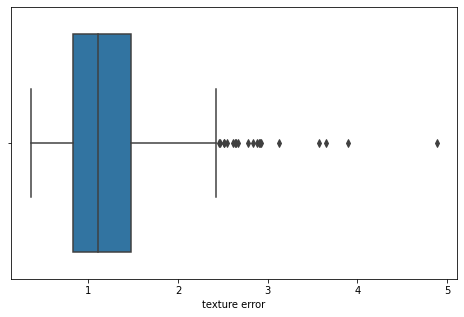

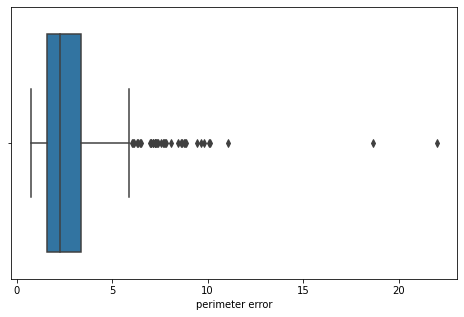

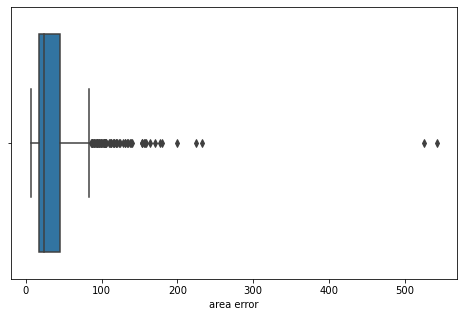

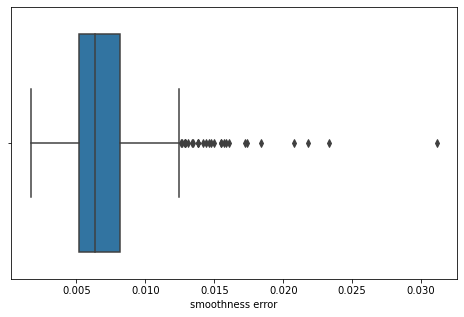

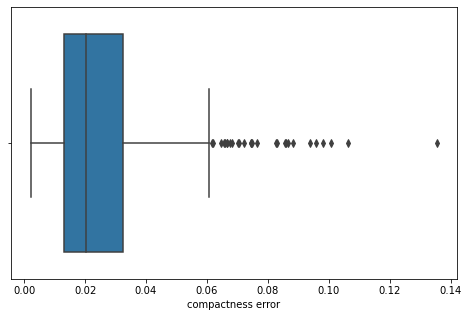

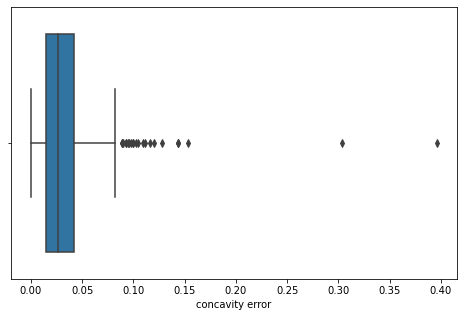

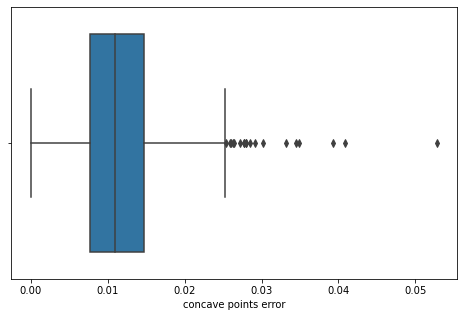

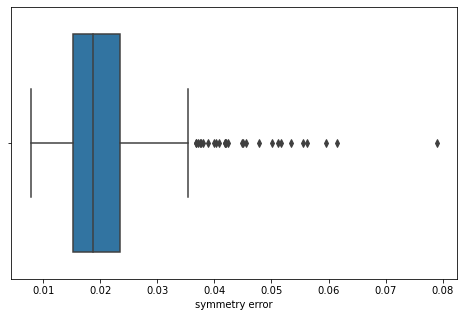

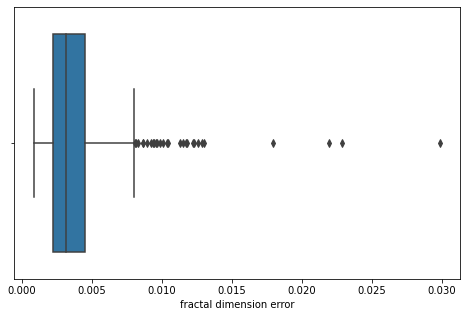

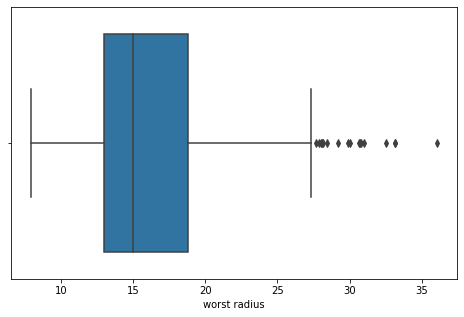

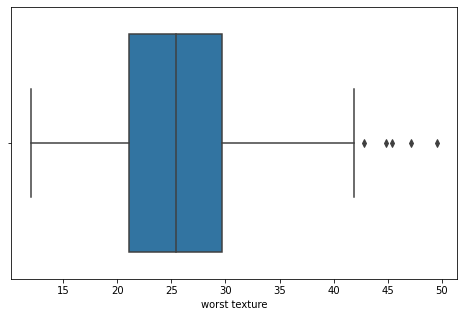

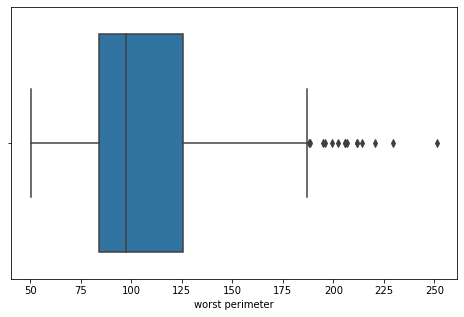

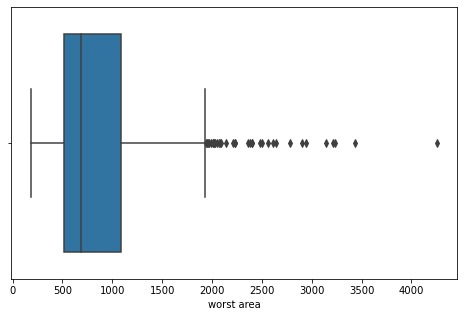

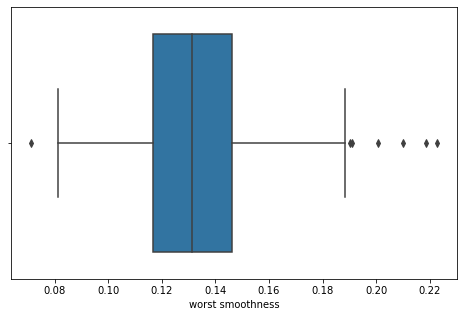

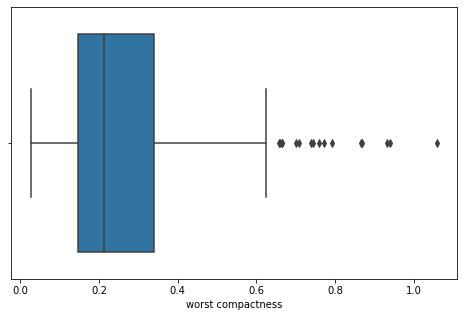

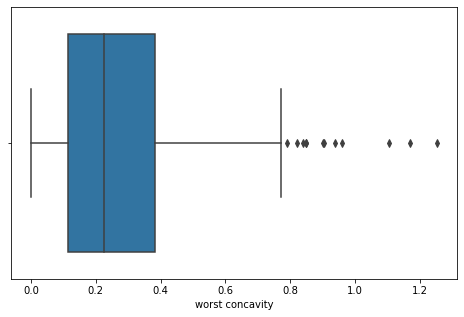

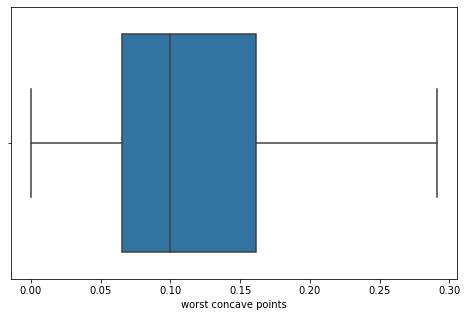

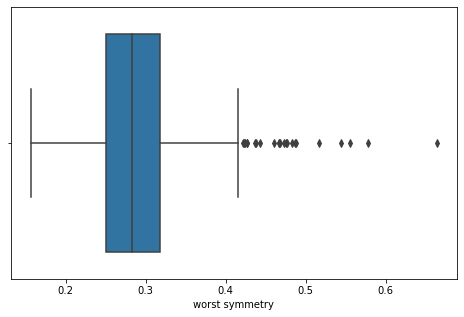

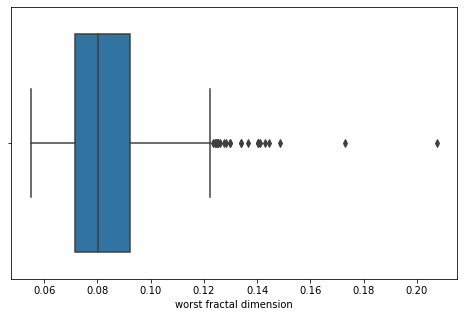

In [68]:
def bplot(col_name,data):
    for column in col_name:
        plt.figure(figsize=(8,5))
        sns.boxplot(x = data[column], data = data)
        plt.show()
        
        q1 = data[column].quantile(0.25)
        q2 = data[column].quantile(0.5)
        q3 = data[column].quantile(0.75)
        
        iqr = q3-q1
        min_val = q1 - 1.5 * iqr
        max_val = q3 + 1.5 * iqr
        data[column] = np.where(data[column] < min_val, q2, data[column])
        data[column] = np.where(data[column] > max_val, q2, data[column])
    return data
df = bplot(df.drop(['Cancer'], axis = 1).columns,df)

In [69]:
# defining feature (X) and (y) 
# X = df.drop('Cancer' , axis = 1 )
# y = df['Cancer']
X = df.drop('Cancer', axis = 1)
y = df['Cancer']

In [70]:
# splitting X and y into training and testing sets 
    
# from sklearn.model_selection import train_test_split 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 32934828)

In [71]:
# create logistic regression object 
reg = linear_model.LogisticRegression(solver = "liblinear") 

In [72]:
# train the model using the training sets 
reg.fit(X_train, y_train) 

LogisticRegression(solver='liblinear')

In [73]:
reg

LogisticRegression(solver='liblinear')

In [74]:
# making predictions on the testing set 
y_pred = reg.predict(X_test) 

In [75]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
225,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,...,16.77,16.90,110.40,873.2,0.1297,0.15250,0.16320,0.10870,0.3062,0.06072
113,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,...,11.16,22.75,72.62,374.4,0.1300,0.20490,0.12950,0.06136,0.2383,0.09026
563,20.92,25.09,143.00,551.1,0.10990,0.22360,0.06154,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.41860,0.65990,0.25420,0.2929,0.09873
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.22640,0.13260,0.10480,0.2250,0.08321
465,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,0.1601,0.06432,...,15.44,25.50,115.00,733.5,0.1201,0.56460,0.65560,0.13570,0.2845,0.08004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,14.81,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.02541,0.1659,0.05348,...,15.61,17.58,101.70,760.2,0.1139,0.10110,0.11010,0.07955,0.2334,0.06142
324,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129,...,13.75,21.38,91.11,583.1,0.1256,0.19280,0.11670,0.05556,0.2661,0.07961
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.1552,0.40560,0.49670,0.18380,0.2822,0.10130
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777


In [76]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1])

In [78]:
# comparing actual response values (y_test) with predicted response values (y_pred) 

print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 91.22807017543859


In [81]:
y_test.value_counts()

1    76
0    38
Name: Cancer, dtype: int64

In [79]:
print(metrics.confusion_matrix(y_test,y_pred))

[[31  7]
 [ 3 73]]


In [80]:
print(metrics.classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        38
           1       0.91      0.96      0.94        76

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

